# Now starting it

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import cv2

2024-12-01 12:56:00.139834: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 12:56:00.422709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733057760.511253     398 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733057760.535001     398 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 12:56:00.735871: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# data_dir='/content/gdrive/MyDrive/Deep learning Notebooks/Cyber CNN/Data'
data_dir = r'New Data'

In [4]:
image_exts=['jpeg','jpg','bmp','png']

In [5]:
label_lst = os.listdir(os.path.join(data_dir))
label_lst

['overripe', 'freshUnripe', 'ripe', 'fresh', 'rotten']

# Load data

In [6]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [7]:
#we cannot use the data directly because it is loaded into memory and being used as a generator
# Load training data
data = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir,
    image_size=(256, 256),
    batch_size=32  
)


Found 4931 files belonging to 5 classes.


I0000 00:00:1733057763.664956     398 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


# Process Data

In [8]:
data=data.map(lambda x,y:(x/255, y))

In [9]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

In [10]:
batch[0]

array([[[[0.37297794, 0.26317403, 0.31023285],
         [0.36862746, 0.25882354, 0.30588236],
         [0.37199754, 0.26219362, 0.30925244],
         ...,
         [0.76709557, 0.79270834, 0.8490196 ],
         [0.74240196, 0.81237745, 0.85876226],
         [0.75373775, 0.8568627 , 0.8928922 ]],

        [[0.3783701 , 0.2685662 , 0.315625  ],
         [0.3737745 , 0.26397058, 0.3110294 ],
         [0.3773897 , 0.26758578, 0.3146446 ],
         ...,
         [0.77867645, 0.78878677, 0.8478554 ],
         [0.7484069 , 0.7941789 , 0.84632355],
         [0.7485907 , 0.82028186, 0.8658701 ]],

        [[0.37984067, 0.27003676, 0.31709558],
         [0.37573528, 0.26593137, 0.3129902 ],
         [0.3788603 , 0.26905638, 0.3161152 ],
         ...,
         [0.79295343, 0.7846201 , 0.84221816],
         [0.7610294 , 0.7766544 , 0.8340074 ],
         [0.7525123 , 0.77751225, 0.84074754]],

        ...,

        [[0.48069853, 0.39442402, 0.44148284],
         [0.47107843, 0.38480392, 0.43186274]

In [11]:
batch[0].max()

1.0

In [12]:
sorted(label_lst)

['fresh', 'freshUnripe', 'overripe', 'ripe', 'rotten']

In [13]:
label_lst = sorted(label_lst)
len(label_lst)

5

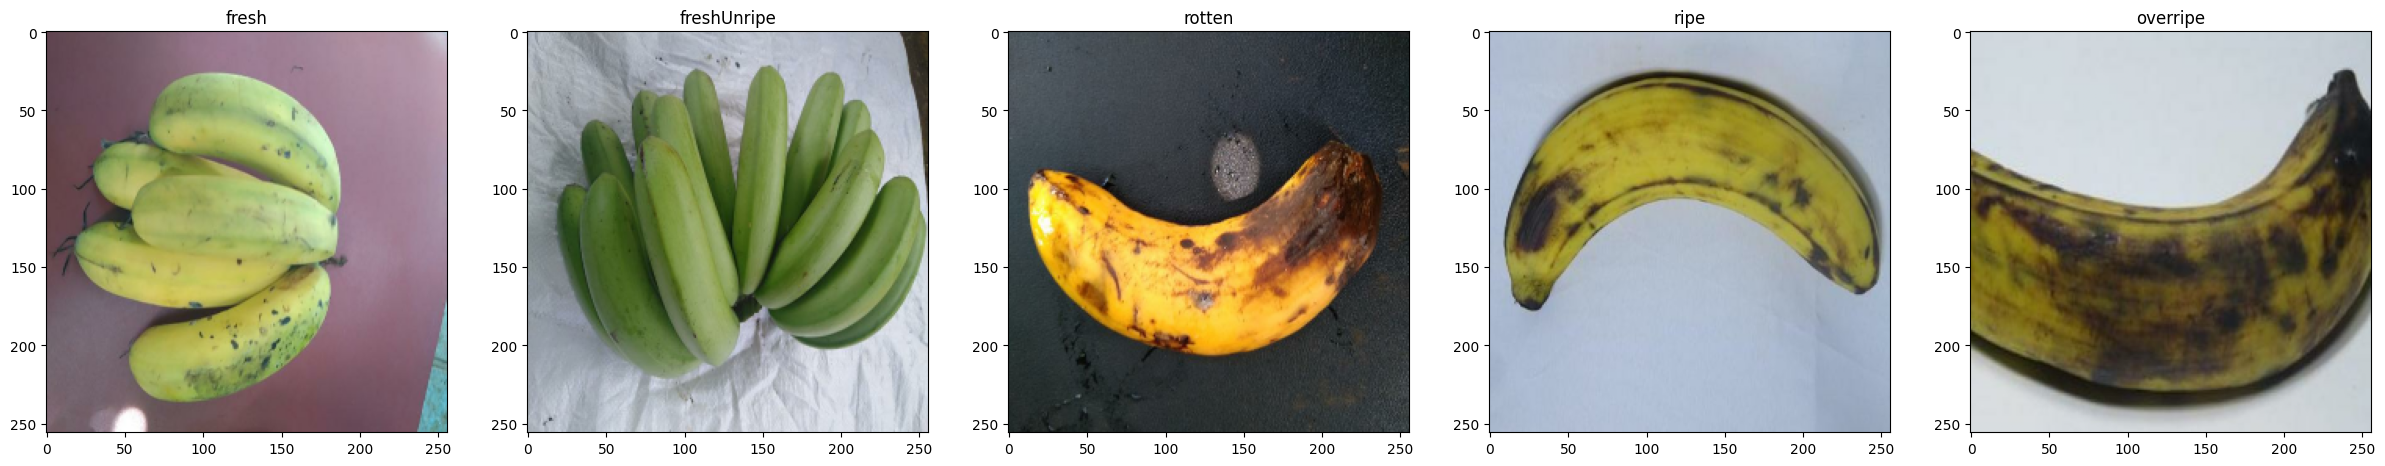

In [14]:
# Initialize the figure and axes
fig, ax = plt.subplots(ncols=len(label_lst), figsize=(30, 30))

# Extract images and labels from the batch
images, labels = batch[0], batch[1]

# Dictionary to hold one image per class
class_images = {}

# Loop through the images and labels, and collect one image per class
for img, label in zip(images, labels):
    if label not in class_images:  # If the class is not already in the dictionary
        class_images[label] = img
    if len(class_images) == len(label_lst):  # Stop once we have one image for each class (0, 1, 2, 3)
        break

# Plot the images from each class
for idx, (label, img) in enumerate(class_images.items()):
    ax[idx].imshow(img)
    ax[idx].title.set_text(f"{label_lst[label]}")


In [15]:
len(data) # no. of batches

155

In [16]:
len(data) # no. of batches

155

In [17]:
train_size=int(len(data)*.7)
train_size

108

In [18]:
test_size=int(len(data)*.3)+1
test_size

47

In [19]:
(test_size+train_size) == len(data)

True

In [20]:
train=data.take(train_size)
# val=data.skip(train_size).take(val_size)
test=data.skip(train_size).take(test_size)

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
len(test)

47

# Deep Models

## Normal CNN

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout, BatchNormalization, Input

In [23]:
model = Sequential()

In [24]:
# Convolutional layers with BatchNormalization and MaxPooling
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Fully connected layers with Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax for multi-class classification
model.add(Dense(5, activation='softmax'))


/home/manas/enter/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,520,805 (32.50 MB)

 Trainable params: 8,520,325 (32.50 MB)

 Non-trainable params: 480 (1.88 KB)

In [26]:
logdir='logs3'

In [27]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001,
    patience=3,
    mode='auto',
    verbose=2,
    baseline=None
)


In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
hist = model.fit(train, epochs=40, validation_data=test, callbacks=[tensorboard_callback])

Epoch 1/40


I0000 00:00:1732518012.416768     504 service.cc:148] XLA service 0x7f77ac004d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732518012.422276     504 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-11-25 07:00:12.600199: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732518012.981307     504 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1732518022.668031     504 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


108/108 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.3123 - loss: 6.1130 - val_accuracy: 0.2969 - val_loss: 6.2508
Epoch 2/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.3734 - loss: 1.4694 - val_accuracy: 0.2963 - val_loss: 8.9267
Epoch 3/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.4142 - loss: 1.3894 - val_accuracy: 0.3166 - val_loss: 8.5728
Epoch 4/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.3560 - loss: 1.4327 - val_accuracy: 0.4312 - val_loss: 2.2419
Epoch 5/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.3587 - loss: 1.4322 - val_accuracy: 0.3498 - val_loss: 5.2766
Epoch 6/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.4309 - loss: 1.3403 - val_accuracy: 0.2264 - val_loss: 22.4495
Epoch 7/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.4370 - loss: 1.3615 - val_accuracy: 0.5953 - val_loss: 1.1189
Epoch 8/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.4935 - loss: 1.2581 - val_accuracy: 0.

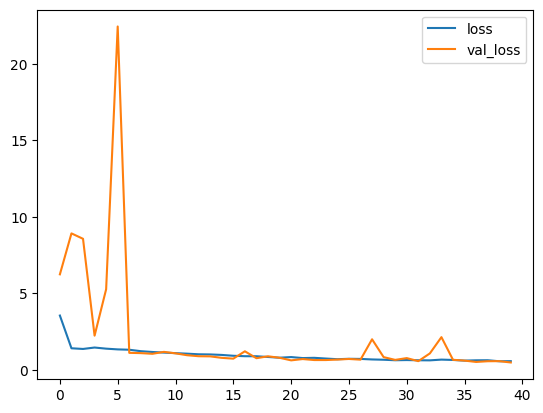

In [31]:
# Loss graph
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

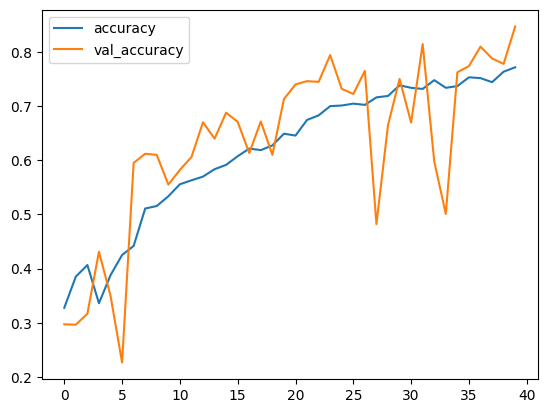

In [32]:
# Accuracy graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Saving model

In [33]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','Banana-Normal-CNN.keras'))

# ResNet

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

In [24]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

base_model.trainable = False
model = Model(inputs=base_model.input, outputs=base_model.output)


x = base_model.output
x = layers.BatchNormalization()(x)  # BatchNormalization on top of ResNet
x = layers.GlobalAveragePooling2D()(x)  # Global Average Pooling instead of Flatten
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense(5, activation='softmax')(x)

modelR = Model(inputs=base_model.input, outputs=output)

In [25]:
modelR.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 24,153,989 (92.14 MB)

 Trainable params: 562,181 (2.14 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

In [26]:
logdir='logs3'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
modelR.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = modelR.fit(train, epochs=40, validation_data=test, callbacks=[tensorboard_callback])


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8491 - loss: 0.4217 - val_accuracy: 0.8136 - val_loss: 0.5975
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.8524 - loss: 0.4015 - val_accuracy: 0.8237 - val_loss: 0.5337
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.8657 - loss: 0.3653 - val_accuracy: 0.8285 - val_loss: 0.5624
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - accuracy: 0.8612 - loss: 0.3800 - val_accuracy: 0.8292 - val_loss: 0.5496
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.8588 - loss: 0.3846 - val_accuracy: 0.8169 - val_loss: 0.5792
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.8605 - loss: 0.3909 - val_accuracy: 0.8237 - val_loss: 0.5431
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.8777 - loss: 0.3405 - val_accuracy: 0.8237 - val_loss: 0.5626
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.8750 - loss: 0

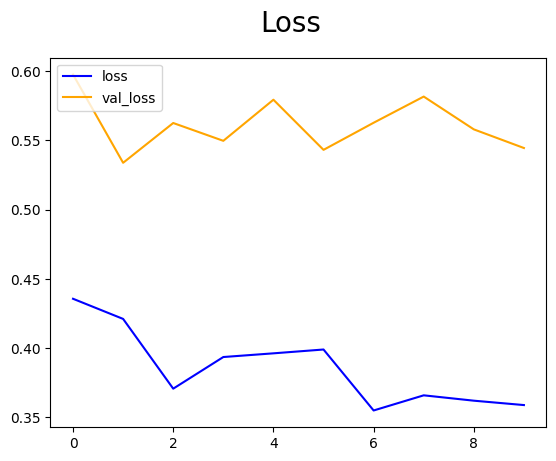

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

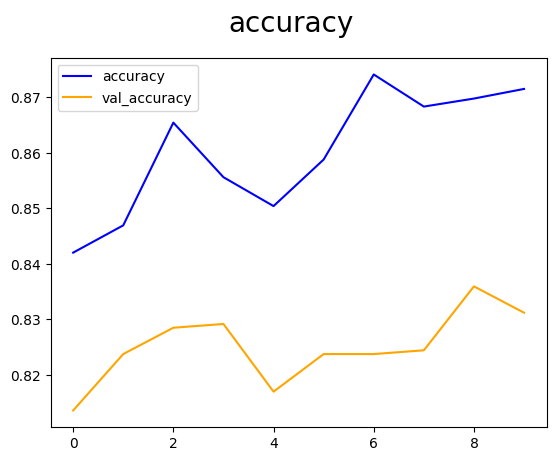

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Saving Model

In [33]:
from tensorflow.keras.models import load_model
modelR.save(os.path.join('models','Banana-resnet.keras'))

# `Mobile Net`

In [24]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [25]:
# Load the pre-trained MobileNet model, excluding the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add your own layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling instead of flattening
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)  # Dense layer
predictions = Dense(5, activation='softmax')(x)  # Final layer for 4 classes

# Final model
model2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

/tmp/ipykernel_3221/1079796078.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [26]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 128, 128, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 128, 128, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 64, 64, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 64, 64, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 64, 64, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 64, 64, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,287,685 (16.36 MB)

 Trainable params: 1,056,773 (4.03 MB)

 Non-trainable params: 3,230,912 (12.32 MB)

In [27]:
logdir='logs3'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(
    monitor='loss', 
    min_delta=0.001,
    patience=3,
    mode='auto',
    verbose=2,
    baseline=None
)


In [30]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model2.fit(train, epochs=30, validation_data=test, callbacks=[tensorboard_callback, early_stopper])


Epoch 1/30


I0000 00:00:1732441324.770987    3310 service.cc:148] XLA service 0x7fae9000b3d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732441324.771106    3310 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-11-24 09:42:04.855372: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732441325.111463    3310 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-24 09:42:05.982528: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2221', 452 bytes spill stores, 452 bytes spill loads

2024-11-24 09:42:06.142730: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22

  3/107 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3073 - loss: 1.6810 

I0000 00:00:1732441331.823531    3310 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7788 - loss: 0.7201

2024-11-24 09:42:19.114865: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_704', 4 bytes spill stores, 4 bytes spill loads

2024-11-24 09:42:19.255717: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_704', 272 bytes spill stores, 272 bytes spill loads

2024-11-24 09:42:19.274771: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_704', 312 bytes spill stores, 312 bytes spill loads



107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.7793 - loss: 0.7188 - val_accuracy: 0.8848 - val_loss: 0.3426
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9235 - loss: 0.2366 - val_accuracy: 0.8971 - val_loss: 0.3207
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9377 - loss: 0.1796 - val_accuracy: 0.8964 - val_loss: 0.3225
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9604 - loss: 0.1080 - val_accuracy: 0.8951 - val_loss: 0.3879
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9592 - loss: 0.1162 - val_accuracy: 0.9033 - val_loss: 0.3566
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9673 - loss: 0.0890 - val_accuracy: 0.9012 - val_loss: 0.3848
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9686 - loss: 0.0874 - val_accuracy: 0.8971 - val_loss: 0.4433
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9752 - loss: 0.0815 - val_accuracy: 0.8

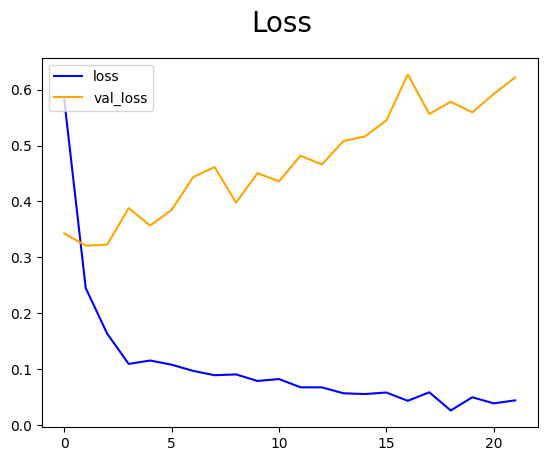

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

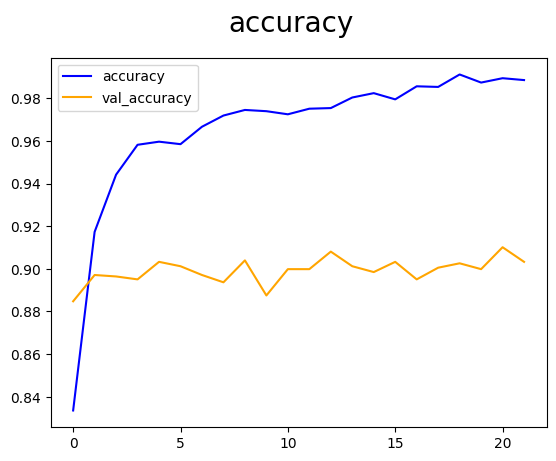

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Saving model

In [34]:
from tensorflow.keras.models import load_model
model2.save(os.path.join('models','Banana-mobile.keras'))

# Alex Net

In [22]:
from keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    min_delta=0.001,
    patience=3,
    mode='auto',
    verbose=2,
    baseline=None,
)

In [24]:
model3 = Sequential()

In [25]:
model3.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(256, 256, 3)))
model3.add(BatchNormalization())  # Normalizing after the first Conv2D layer
model3.add(MaxPooling2D((3, 3), strides=2))

# Second Convolutional Block
model3.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model3.add(BatchNormalization())  # Normalizing after the second Conv2D layer
model3.add(MaxPooling2D((3, 3), strides=2))

# Third Convolutional Block
model3.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())  # Normalizing after the third Conv2D layer
model3.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())  # Normalizing after the fourth Conv2D layer
model3.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())  # Normalizing after the fifth Conv2D layer
model3.add(MaxPooling2D((3, 3), strides=2))

# Flatten the output
model3.add(Flatten())

# Dense Layers (adjusted to match the flattened output)
model3.add(Dense(9216, activation='relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())  # Normalizing after the first Dense layer

model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())  # Normalizing after the second Dense layer

model3.add(Dense(len(label_lst), activation='softmax'))

/home/manas/enter/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9216)           │    84,943,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 9216)           │        36,864 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 126,523,141 (482.65 MB)

 Trainable params: 126,493,765 (482.54 MB)

 Non-trainable params: 29,376 (114.75 KB)

In [27]:
logdir='logs3'

In [28]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
tensorboard_callback

In [29]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
hist = model3.fit(train, epochs=50, validation_data=test, callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/50


I0000 00:00:1732441705.821924    4425 service.cc:148] XLA service 0x7f8b7801bd80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732441705.821983    4425 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-11-24 09:48:25.974510: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732441706.308522    4425 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1732441713.782202    4425 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


107/107 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.5896 - loss: 1.2631 - val_accuracy: 0.2826 - val_loss: 4.8081
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.7557 - loss: 0.8198 - val_accuracy: 0.3395 - val_loss: 4.5617
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7964 - loss: 0.6998 - val_accuracy: 0.2901 - val_loss: 6.5038
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.8123 - loss: 0.6117 - val_accuracy: 0.4348 - val_loss: 3.7168
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.8323 - loss: 0.5618 - val_accuracy: 0.7112 - val_loss: 1.2584
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.8478 - loss: 0.4570 - val_accuracy: 0.7462 - val_loss: 1.3252
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.8541 - loss: 0.4466 - val_accuracy: 0.6049 - val_loss: 2.4033
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.8654 - loss: 0.4051 - val_acc

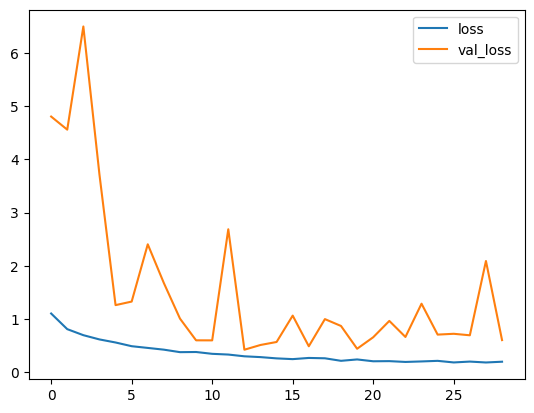

In [31]:
# Loss graph
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

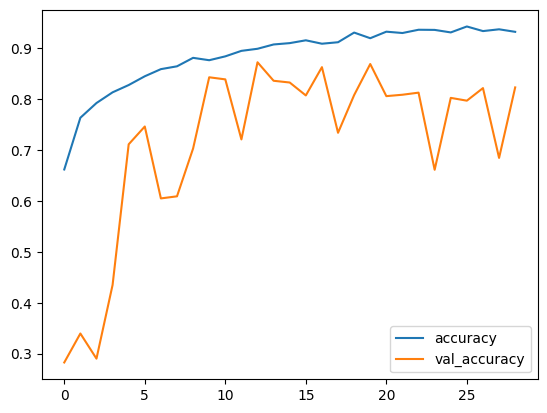

In [32]:
# Accuracy graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()

### Saving model

In [33]:
from tensorflow.keras.models import load_model
model3.save(os.path.join('models','Banana-alex.keras'))

# Taking model

In [71]:
from tensorflow.keras.models import load_model

model = load_model('models//Banana-mobile.keras')

In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,561,070 (97.51 MB)

 Trainable params: 8,520,196 (32.50 MB)

 Non-trainable params: 480 (1.88 KB)

 Optimizer params: 17,040,394 (65.00 MB)

# Model Test with val_data

In [73]:
data_val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [74]:
data_val=data_val.map(lambda x,y:(x/255, y))
# warning

In [75]:
scaled_iterator_val=data_val.as_numpy_iterator()
batch_val=scaled_iterator_val.next()

In [78]:
batch_val[1]

array([1, 2, 1, 0, 0, 2, 3, 3, 3, 1, 2, 0, 2, 3, 2, 1, 3, 0, 0, 3, 2, 1,
       2, 1, 3, 0, 2, 1, 0, 2, 3, 1])

In [79]:
a = np.array([1,2,3])
b = np.array([1,2,3])

np.array_equal(a, b) 

True

In [80]:
lst = a.tolist()
lst

[1, 2, 3]

In [81]:
lst.extend([4,5,6])

In [82]:
lst

[1, 2, 3, 4, 5, 6]

In [83]:
all_labels = []
pred = []

for batch in data_val.as_numpy_iterator():
    X,y = batch
    p = model.predict(X)
    
    # Extends all labels
    all_labels.extend(y.tolist())
    # Prediction extend
    pred.extend(p.tolist())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [84]:
all_labels = np.array(all_labels)

In [85]:
pred = np.array(pred)

In [86]:
pred_class = np.argmax(pred, axis=1)
pred_class

array([0, 2, 3, ..., 1, 1, 2], dtype=int64)

In [87]:
len(pred_class)

1197

In [88]:
def plot_confusion_matrix(Title, y_true, y_pred, color, Labels_list, a=10,b=5):

    """
    Function prints the plot and of confusion matrix
    """
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred)
    confusion_matrix_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create the heatmap
    plt.figure(figsize=(a, b))
    sns.heatmap(confusion_matrix_percentage, annot=True, fmt=".2f", cmap=color, cbar=True,
                annot_kws={"size": 14}, linewidths=0.5, linecolor='black', xticklabels=Labels_list, yticklabels=Labels_list)

    # Add a percentage sign to the annotations
    for text in plt.gca().texts:
        text.set_text(text.get_text() + '%')

    # Set labels and title
    plt.xlabel('Predicted Labels', fontsize=18, fontweight='bold')
    plt.ylabel('True Labels', fontsize=18, fontweight='bold')
    plt.title(Title, fontsize=22, fontweight='bold')

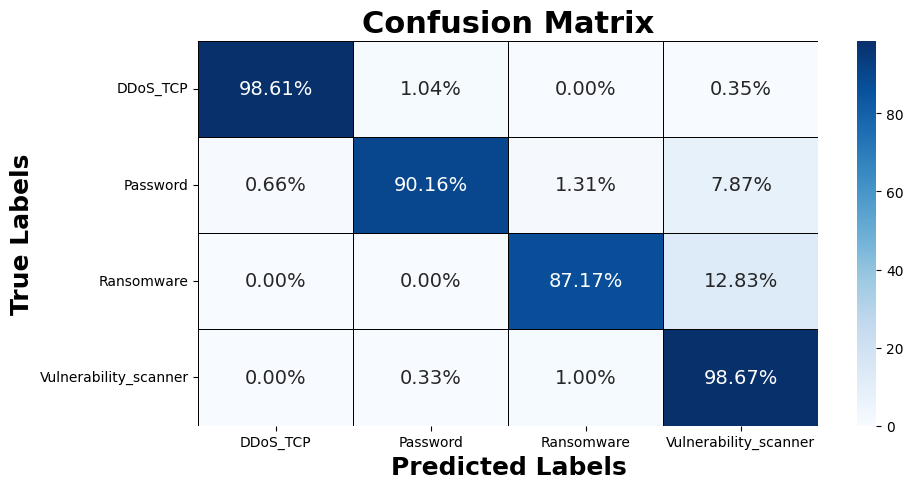

In [89]:
plot_confusion_matrix("Confusion Matrix", all_labels, pred_class, 'Blues', label_lst)

In [90]:
from sklearn.metrics import accuracy_score, classification_report

In [91]:
accuracy_score(all_labels, pred_class)

0.935672514619883

In [92]:
print(classification_report(all_labels, pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       288
           1       0.99      0.90      0.94       305
           2       0.97      0.87      0.92       304
           3       0.82      0.99      0.90       300

    accuracy                           0.94      1197
   macro avg       0.94      0.94      0.94      1197
weighted avg       0.94      0.94      0.94      1197



# Graph

In [36]:
label_lst

['DDoS_TCP', 'Password', 'Ransomware', 'Vulnerability_scanner']

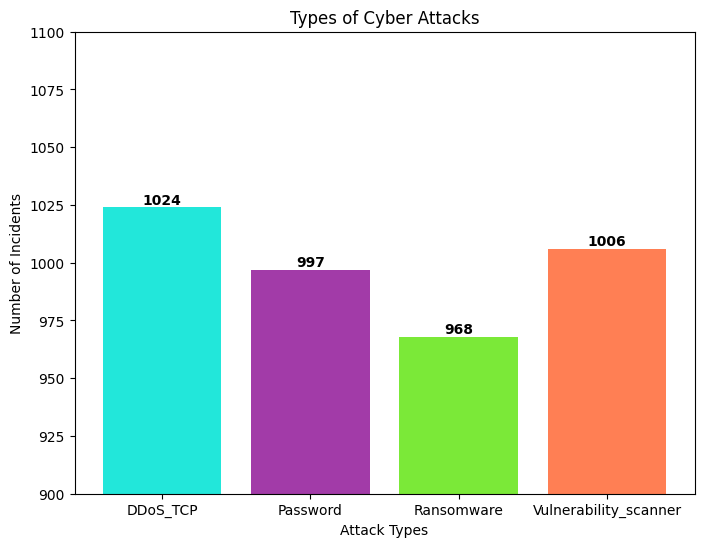

In [60]:
import matplotlib.pyplot as plt

# Data
label_lst = ['glioma', 'meningioma', 'notumor', 'pituitary']
num_label = [1321, 1339, 1595, 1457]

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(label_lst, num_label, color=['#22e7da', '#a23ba8', '#7be938', '#ff7f54'])

# Add labels and title
plt.xlabel('Brain Tumor types')
plt.ylabel('Number of cases')
plt.title('Types of Brain Tumor')

# Adjust y-axis to start closer to the minimum value
plt.ylim(900, 1100)  # Set the y-axis range to highlight differences

# # Display the value on top of each bar
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height - 10, f'{height}', ha='center', va='bottom', color='black', fontweight='bold')

# # Show the plot
# plt.show()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0, f'{height}', ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.savefig('type-brain.png', dpi=300)
plt.show()
